In [78]:
!pip3 install essentia

In [79]:
!pip3 install madmom

In [80]:
!pip3 install mir_eval

The section below is all path dependent

In [81]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
root = 'drive/MyDrive/Bass/'

import pandas as pd
import sys
sys.path.append(root)

Mounted at /content/drive


In [82]:
import madmom

In [83]:
!ls 'drive/MyDrive/Bass'

 001_beats.csv
 001_beats.gsheet
 002_beats.csv
 abesser_music
 bassunet.py
 data
 data_old
 deviations
 EnergyChecker_AllStems.ipynb
 EnergyChecker_Student_TrinityBillieJean.ipynb
 grades
 HistogramTestBillieJean.ipynb
 HistogramTestBrown.ipynb
 HistogramTestJust.ipynb
 HistogramTestRoad.ipynb
 HistogramTestWOTM.ipynb
 HistogramTestYellow.ipynb
 IEC_billieJean.csv
 __init__.py
 LICENSE
 music
 notebooks_june
 notebooks_may
 pooling.py
 __pycache__
 README.md
 SG_Student_TrinityWOTM.ipynb
 SOP_Student_TrinityBillieJean.ipynb
 statistics
 Statistics_IEC_billieJean.csv
 StudentStatistics_BillieJean.csv
 StudentStatistics_blend_justlooking.csv
 StudentStatisticsInput.csv
 tcl_annotate
 Test_Student_ONSET_TrinityYellow.ipynb
'Thesis Review Meeting.gdoc'
 txt


In [84]:
# TODO 1 optimise imports
from essentia.standard import *
from essentia import Pool, array
import essentia.standard as es
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
import pandas as pd
import os

import IPython
import pickle
from pickle import load
from scipy.signal import find_peaks
import ipywidgets as widgets
from scipy import signal
from lxml import etree

import plotly.express as px
import scipy
from statistics import *

In [85]:
import mir_eval
from mir_eval import *

In [86]:
!ls drive/MyDrive/Bass/deviations


billieJean0_both_osets.csv     justlooking_iec_student12.csv
billieJean10_both_osets.csv    justlooking_iec_student1.csv
billieJean11_both_osets.csv    justlooking_iec_student2.csv
billieJean12_both_osets.csv    justlooking_iec_student3.csv
billieJean13_both_osets.csv    justlooking_iec_student4.csv
billieJean14_both_osets.csv    justlooking_iec_student5.csv
billieJean15_both_osets.csv    justlooking_iec_student6.csv
billieJean1_both_osets.csv     justlooking_iec_student7.csv
billieJean2_both_osets.csv     justlooking_iec_student8.csv
billieJean3_both_osets.csv     justlooking_iec_student9.csv
billieJean4_both_osets.csv     legacy
billieJean5_both_osets.csv     onsets_wotm.csv
billieJean6_both_osets.csv     roadrunner_iec_student0.csv
billieJean7_both_osets.csv     roadrunner_iec_student1.csv
billieJean8_both_osets.csv     roadrunner_iec_student2.csv
billieJean9_both_osets.csv     roadrunner_iec_student3.csv
billieJean_iec_stem.csv        roadrunner_iec_student4.csv
billieJean_iec_stud

In [87]:
statsPath = 'drive/MyDrive/Bass/data/road/StudentStatistics_road.csv'
statsCols = ["Student", "precision", "recall", "f_measure_value", "Onset ABS Mean", "Onset Mean", "Onset Std",
             "Duration ABS Mean", "Duration Mean", "Duration Std", "onsetMark", " DurationMark", " TF 1 Mark ",
             " TF 2 Mark ", "Sound Quality Mark", " finalMark"]
df_all = pd.read_csv(statsPath, usecols=statsCols)
   

In [88]:
onset_mean_list = df_all["Onset Mean"].tolist()   
print(len(onset_mean_list))
#Student 	precision 	recall 	f_measure_value 	Onset ABS Mean 	Onset Mean 	Onset Std 	Duration ABS Mean 	Duration Mean 	Duration Std 	onsetMark 	DurationMark 	articulationMark 	soundQualityMark 	volumeControlMark 	finalMark

9


In [89]:
print(len(onset_mean_list))
m = mean(onset_mean_list)
print (onset_mean_list)

9
[-0.006, -0.006, -0.006999999999999999, -0.006999999999999999, 0.006999999999999999, -0.0, -0.002, -0.01, -0.008]


In [90]:
#
#
#  This allows the generation of multiple histograms by passing the K parameter.
#
#
from math import *
def multiple_hist(deviationsArray1,deviationsArray2,title_text1,title_text2,df,k):
   student_stats1 = [] # onsets
   student_stats2 = [] # durations
   list0 = df["onsetMark"].tolist()  
   list1 = df[" DurationMark"].tolist()  
   list2 = df[" TF 1 Mark "].tolist()  
   list3 = df[" TF 2 Mark "].tolist()  
   list4 = df["Sound Quality Mark"].tolist()  
   list5 = df[" finalMark"].tolist()  
   #k = 0 # Zeroth student is GT
   print("Onset Grade = ", list0[k],"\t" ,"Offset Grade = ", list1[k])
   print("\n")
   print("TF 1 Mark = ", list2[k],"TF 2 Mark = ", list3[k])
   print("Sound Q Grade = ", list4[k])
   print("Final Mark = ", list5[k])
   print("ok1",deviationsArray1)
   a= deviationsArray1
   m= mean(a)
   print(m)
   s = sqrt(mean(a*a))
   print("ok3")
   am = mean(abs(a))

   onset_summary= "Onset ABS Mean: %f, Onset Mean: %f,Dev. from 0: %f" %(am, m, s)
   title =   "Student "  + str(k) +title_text1
   plt.subplot(2,2,1)
   plt.title(title)
   plt.figure(1, figsize=(9.5, 6))
   plt.hist(a)

   plt.subplot(2,2,2)
   a = deviationsArray2
   m, s = mean(a), sqrt(mean(a*a))
   am = mean(abs(a))
   offset_summary= "Offset ABS Mean: %f, Offset Mean: %f, Dev. from 0: %f" %(am,m, s)
   title =   "Student " + str(k) +title_text2
   plt.title(title)
   plt.figure(1, figsize=(9.5, 6))
   plt.hist(a)
   plt.show()

In [91]:
index = df_all.index
number_of_rows = len(index)
print(number_of_rows)
df_all

9


,Student,precision,recall,f_measure_value,Onset ABS Mean,Onset Mean,Onset Std,Duration ABS Mean,Duration Mean,Duration Std,onsetMark,DurationMark,TF 1 Mark,TF 2 Mark,Sound Quality Mark,finalMark
0,0,0.960,0.950,0.955,0.008,-0.006,0.009,0.008,-0.006,0.009,100.0,100.0,100.0,100.0,100.0,5.00
1,1,0.337,0.347,0.341,0.010,-0.006,0.012,0.072,-0.065,0.162,72.0,79.2,79.2,79.2,79.2,3.15
2,2,0.147,0.149,0.148,0.010,-0.007,0.012,0.052,-0.014,0.078,79.2,90.0,79.2,79.2,79.2,3.60
3,3,0.298,0.277,0.287,0.009,-0.007,0.011,0.056,-0.012,0.119,79.2,79.2,90.0,79.2,79.2,3.60
4,4,0.019,0.020,0.019,0.007,0.007,0.007,0.064,-0.064,0.075,56.7,56.7,72.0,72.0,72.0,2.25
5,5,0.531,0.505,0.518,0.010,-0.000,0.012,0.079,-0.038,0.166,72.0,79.2,79.2,79.2,79.2,3.60
6,6,0.029,0.030,0.029,0.012,-0.002,0.014,0.068,-0.068,0.070,72.0,79.2,79.2,79.2,79.2,3.60
7,7,0.029,0.030,0.030,0.010,-0.010,0.011,0.109,0.022,0.127,79.2,79.2,79.2,90.0,79.2,3.60
8,8,0.269,0.287,0.278,0.010,-0.008,0.012,0.044,-0.037,0.106,90.0,90.0,90.0,90.0,79.2,4.50


<class 'numpy.float64'>
Onset Grade =  100.0 	 Offset Grade =  100.0


TF 1 Mark =  100.0 TF 2 Mark =  100.0
Sound Q Grade =  100.0
Final Mark =  5.0
ok1 0    -0.002018
1    -0.002642
2    -0.009184
3    -0.005408
4    -0.015295
        ...   
91   -0.010011
92    0.009615
93   -0.013866
94   -0.005465
95    0.009592
Name: onset dev, Length: 96, dtype: float64
-0.005868056135416522
ok3


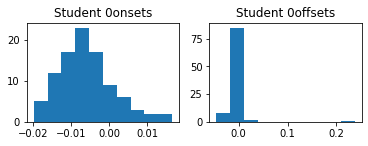

<class 'numpy.float64'>
Onset Grade =  72.0 	 Offset Grade =  79.2


TF 1 Mark =  79.2 TF 2 Mark =  79.2
Sound Q Grade =  79.2
Final Mark =  3.15
ok1 0     0.004739
1     0.008084
2     0.004116
3    -0.013311
4     0.011746
5     0.006644
6    -0.016984
7     0.000816
8    -0.013639
9     0.011417
10   -0.005295
11   -0.002029
12    0.008027
13   -0.004172
14   -0.017914
15   -0.016735
16   -0.018447
17   -0.007789
18    0.002925
19   -0.002018
20   -0.012698
21   -0.018753
22   -0.013696
23    0.006848
24    0.001905
25   -0.000862
26   -0.014025
27    0.001689
28   -0.017766
29   -0.019478
30   -0.010533
31   -0.019989
32   -0.009444
33   -0.003844
34   -0.015011
Name: onset dev, dtype: float64
-0.0058707490000001784
ok3


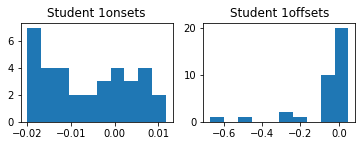

<class 'numpy.float64'>
Onset Grade =  79.2 	 Offset Grade =  90.0


TF 1 Mark =  79.2 TF 2 Mark =  79.2
Sound Q Grade =  79.2
Final Mark =  3.6
ok1 0     0.005907
1    -0.004036
2    -0.000261
3     0.011565
4    -0.011916
5     0.003016
6    -0.013583
7    -0.019082
8    -0.005079
9    -0.012619
10   -0.007075
11   -0.017018
12    0.004138
13   -0.019025
14   -0.018311
Name: onset dev, dtype: float64
-0.006891913133333697
ok3


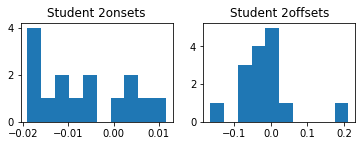

<class 'numpy.float64'>
Onset Grade =  79.2 	 Offset Grade =  79.2


TF 1 Mark =  90.0 TF 2 Mark =  79.2
Sound Q Grade =  79.2
Final Mark =  3.6
ok1 0    -0.009093
1     0.000964
2    -0.016916
3     0.001689
4    -0.008254
5    -0.009966
6     0.002472
7    -0.011984
8    -0.004184
9    -0.013583
10   -0.016973
11    0.000828
12   -0.017846
13   -0.005419
14    0.002381
15    0.017982
16   -0.018730
17   -0.007098
18    0.000215
19   -0.018696
20    0.002517
21   -0.014683
22   -0.009626
23   -0.001599
24   -0.002766
25   -0.019478
26   -0.015533
27   -0.009989
Name: onset dev, dtype: float64
-0.007263120785714053
ok3


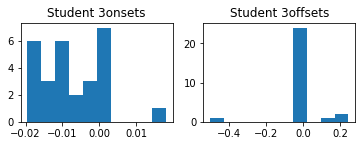

<class 'numpy.float64'>
Onset Grade =  56.7 	 Offset Grade =  56.7


TF 1 Mark =  72.0 TF 2 Mark =  72.0
Sound Q Grade =  72.0
Final Mark =  2.25
ok1 0    0.005964
1    0.007982
Name: onset dev, dtype: float64
0.006972789500000687
ok3


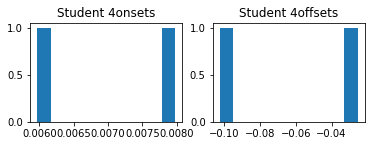

<class 'numpy.float64'>
Onset Grade =  72.0 	 Offset Grade =  79.2


TF 1 Mark =  79.2 TF 2 Mark =  79.2
Sound Q Grade =  79.2
Final Mark =  3.6
ok1 0     0.019739
1    -0.006916
2    -0.015884
3    -0.018311
4     0.015034
5    -0.003356
6    -0.002528
7     0.011361
8     0.019705
9     0.003027
10    0.005828
11    0.004116
12   -0.005714
13    0.002086
14   -0.016281
15   -0.007449
16   -0.000079
17   -0.011735
18   -0.018447
19   -0.003390
20   -0.007846
21    0.012211
22   -0.017245
23    0.017925
24    0.012982
25   -0.013730
26   -0.002698
27   -0.009898
28    0.002902
29   -0.014785
30   -0.018152
31   -0.008095
32   -0.017063
33   -0.010918
34   -0.008741
35    0.016803
36    0.016372
37    0.001485
38   -0.007483
39    0.005374
40    0.017687
41    0.010975
42   -0.008481
43    0.008401
44    0.011689
45   -0.003934
46   -0.010590
47    0.014467
48    0.010556
49   -0.000011
50    0.009592
Name: onset dev, dtype: float64
-0.0003812646078432268
ok3


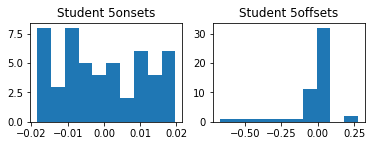

<class 'numpy.float64'>
Onset Grade =  72.0 	 Offset Grade =  79.2


TF 1 Mark =  79.2 TF 2 Mark =  79.2
Sound Q Grade =  79.2
Final Mark =  3.6
ok1 0   -0.018435
1    0.014830
2   -0.003424
Name: onset dev, dtype: float64
-0.002343160666667583
ok3


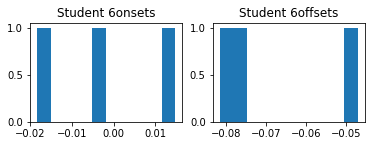

<class 'numpy.float64'>
Onset Grade =  79.2 	 Offset Grade =  79.2


TF 1 Mark =  79.2 TF 2 Mark =  90.0
Sound Q Grade =  79.2
Final Mark =  3.6
ok1 0   -0.009036
1   -0.006599
2   -0.015465
Name: onset dev, dtype: float64
-0.010366590333333647
ok3


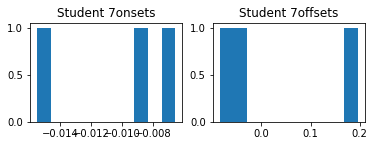

<class 'numpy.float64'>
Onset Grade =  90.0 	 Offset Grade =  90.0


TF 1 Mark =  90.0 TF 2 Mark =  90.0
Sound Q Grade =  79.2
Final Mark =  4.5
ok1 0    -0.004093
1     0.000964
2    -0.010261
3    -0.003435
4    -0.018311
5    -0.017585
6    -0.012528
7    -0.000295
8    -0.002449
9    -0.010420
10   -0.012619
11   -0.012075
12   -0.007018
13    0.005215
14   -0.013095
15   -0.005862
16   -0.014683
17   -0.019626
18    0.007687
19   -0.019025
20   -0.018481
21    0.013401
22   -0.018934
23   -0.000533
24   -0.004989
25   -0.019444
26    0.008356
27    0.001156
28   -0.010408
Name: onset dev, dtype: float64
-0.0075650954137934006
ok3


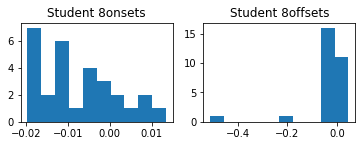

In [92]:
col_list = ["onset dev", "offset dev"]
sonset_deviations = []
soffset_deviations = []
# sonset_deviations,soffset_deviations
k=0

while k<number_of_rows:
   sdeviatePath = 'drive/MyDrive/Bass/data/road/road_devs_student' + str(k)+ '.csv'
   sdf = pd.read_csv(sdeviatePath, usecols=col_list)
   sonset_dev_list = sdf["onset dev"]
   sonset_deviations.append(sonset_dev_list)
   soffset_dev_list = sdf["offset dev"] 
   soffset_deviations.append(soffset_dev_list)
   print(type(sonset_dev_list[0]))
   multiple_hist(sonset_dev_list,soffset_dev_list,"onsets","offsets",df_all,k)
   k+=1


In [93]:
df_all

,Student,precision,recall,f_measure_value,Onset ABS Mean,Onset Mean,Onset Std,Duration ABS Mean,Duration Mean,Duration Std,onsetMark,DurationMark,TF 1 Mark,TF 2 Mark,Sound Quality Mark,finalMark
0,0,0.960,0.950,0.955,0.008,-0.006,0.009,0.008,-0.006,0.009,100.0,100.0,100.0,100.0,100.0,5.00
1,1,0.337,0.347,0.341,0.010,-0.006,0.012,0.072,-0.065,0.162,72.0,79.2,79.2,79.2,79.2,3.15
2,2,0.147,0.149,0.148,0.010,-0.007,0.012,0.052,-0.014,0.078,79.2,90.0,79.2,79.2,79.2,3.60
3,3,0.298,0.277,0.287,0.009,-0.007,0.011,0.056,-0.012,0.119,79.2,79.2,90.0,79.2,79.2,3.60
4,4,0.019,0.020,0.019,0.007,0.007,0.007,0.064,-0.064,0.075,56.7,56.7,72.0,72.0,72.0,2.25
5,5,0.531,0.505,0.518,0.010,-0.000,0.012,0.079,-0.038,0.166,72.0,79.2,79.2,79.2,79.2,3.60
6,6,0.029,0.030,0.029,0.012,-0.002,0.014,0.068,-0.068,0.070,72.0,79.2,79.2,79.2,79.2,3.60
7,7,0.029,0.030,0.030,0.010,-0.010,0.011,0.109,0.022,0.127,79.2,79.2,79.2,90.0,79.2,3.60
8,8,0.269,0.287,0.278,0.010,-0.008,0.012,0.044,-0.037,0.106,90.0,90.0,90.0,90.0,79.2,4.50


In [94]:
print(df_all.index)
number_of_rows = len(df_all.index)
print(number_of_rows)
df_all

RangeIndex(start=0, stop=9, step=1)
9


,Student,precision,recall,f_measure_value,Onset ABS Mean,Onset Mean,Onset Std,Duration ABS Mean,Duration Mean,Duration Std,onsetMark,DurationMark,TF 1 Mark,TF 2 Mark,Sound Quality Mark,finalMark
0,0,0.960,0.950,0.955,0.008,-0.006,0.009,0.008,-0.006,0.009,100.0,100.0,100.0,100.0,100.0,5.00
1,1,0.337,0.347,0.341,0.010,-0.006,0.012,0.072,-0.065,0.162,72.0,79.2,79.2,79.2,79.2,3.15
2,2,0.147,0.149,0.148,0.010,-0.007,0.012,0.052,-0.014,0.078,79.2,90.0,79.2,79.2,79.2,3.60
3,3,0.298,0.277,0.287,0.009,-0.007,0.011,0.056,-0.012,0.119,79.2,79.2,90.0,79.2,79.2,3.60
4,4,0.019,0.020,0.019,0.007,0.007,0.007,0.064,-0.064,0.075,56.7,56.7,72.0,72.0,72.0,2.25
5,5,0.531,0.505,0.518,0.010,-0.000,0.012,0.079,-0.038,0.166,72.0,79.2,79.2,79.2,79.2,3.60
6,6,0.029,0.030,0.029,0.012,-0.002,0.014,0.068,-0.068,0.070,72.0,79.2,79.2,79.2,79.2,3.60
7,7,0.029,0.030,0.030,0.010,-0.010,0.011,0.109,0.022,0.127,79.2,79.2,79.2,90.0,79.2,3.60
8,8,0.269,0.287,0.278,0.010,-0.008,0.012,0.044,-0.037,0.106,90.0,90.0,90.0,90.0,79.2,4.50


In [95]:
import csv  
#onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std= 
# statisticsGenerator(sonset_deviationsArray,sduration_deviationsArray," onsets", " durations",the_student_grades,sp,sr,sf)

def statisticsGenerator(deviationsArray1,deviationsArray2,title_text1,title_text2,df):
   header = ["Student", "precision", "recall", "f_measure_value", "Onset ABS Mean", "Onset Mean", "Onset Std",
             "Duration ABS Mean", "Duration Mean", "Duration Std", "onsetMark", " DurationMark", " TF 1 Mark ",
             " TF 2 Mark ", "Sound Quality Mark", " finalMark"]

   studentStatisticsArray= []
   with open('drive/MyDrive/Bass/data/road/StudentStatistics_road_out.csv', 'w', encoding='UTF8') as f:
      idx = df.index

      number_of_rows = len(idx)
      print(number_of_rows)
      k=0

      writer = csv.writer(f)
      # write the header
      writer.writerow(header)

      studentStatistics = []
      onset_X = []  # Martis mark
      onset_amean = []
      onset_mean = []
      onset_std= []

      duration_X = [] # Martis mark
      duration_amean = []
      duration_mean = []
      duration_std= []
      list0 = df["onsetMark"].tolist()  
      list1 = df[" DurationMark"].tolist()  
      list2 = df[" TF 1 Mark "].tolist()  
      list3 = df[" TF 2 Mark "].tolist()  
      list4 = df["Sound Quality Mark"].tolist()  
      list5 = df[" finalMark"].tolist()  
      listp = df["precision"].tolist()  
      listr = df["recall"].tolist()  
      listf = df["f_measure_value"].tolist()  
      print("###################### number_of_rows",number_of_rows)
      while k < number_of_rows-1:
          studentStatistics.append(str(k+1))
          student_stats1 = [] # onsets
          student_stats2 = [] # durations

          plt.subplot(2,2,1)
          a = np.array(deviationsArray1[k])
          print(a[0:12])
          onset_m, onset_s = mean(a), sqrt(mean(a*a))
          onset_am= mean(abs(a))
          onset_summary= "Onset ABS  Mean: %f,Onset Mean: %f, Dev. from 0: %f" %(onset_am,onset_m, onset_s)
          title =   "Student " + str(k)+ title_text1

          onset_X.append( list0[k])  # Martis mark
          print("list0[k]")
          print(list0[k])
          onset_mean.append(onset_m)
          onset_amean.append(onset_am)
          onset_std.append(onset_s)

          plt.title(title)
          plt.figure(1, figsize=(9.5, 6))
          plt.hist(a)

          plt.subplot(2,2,2)
          a = np.array(deviationsArray2[k])
          duration_m, duration_s = mean(a), sqrt(mean(a*a))
          duration_am= mean(abs(a))
          duration_summary= "Offset Mean: %f, Dev. from 0: %f" %(duration_m, duration_s)
          title =   "Student " + str(k)+ title_text2
          print(title)
          duration_X.append( list1[k])  # Martis mark
          duration_mean.append(duration_m)
          duration_amean.append(duration_am)
          duration_std.append(duration_s)

          plt.title(title)
          plt.figure(1, figsize=(9.5, 6))
          plt.hist(a)

          plt.show()
          print("Onset Grade = ", list0[k],"\t" ,"Duration Grade = ", list1[k])
          print("\n")
          print(onset_summary)
          print("\n")
          print(duration_summary)
          print("\n")
          print("Articulation Grade = ", list2[k],"Sound Control Grade = ", list3[k])
          print("Final Mark = ", list4[k])
          studentStatistics = []
          studentStatistics.append(str(k))
          studentStatistics.append(round(listp[k],3))
          print("////////////////////////////")
          print(round(listp[k],3))
          studentStatistics.append(round(listr[k],3))
          studentStatistics.append(round(listf[k],3))
          studentStatistics.append(round(onset_am,3))
          studentStatistics.append(round(onset_m,3))
          studentStatistics.append(round(onset_s,3))   
          studentStatistics.append(round(duration_am,3))                   
          studentStatistics.append(round(duration_m,3)) 
          studentStatistics.append(round(duration_s,3))   
          studentStatistics.append(list0[k])
          studentStatistics.append(list1[k])
          studentStatistics.append(list2[k])
          studentStatistics.append(list3[k])
          studentStatistics.append(list4[k])
          studentStatistics.append(list5[k])
          # write the data
          writer.writerow(studentStatistics)
          studentStatisticsArray.append(studentStatistics)
          k+=1
    
   return(onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std,studentStatisticsArray,onset_amean, duration_amean)
# Capture a table of onset and grade


9
###################### number_of_rows 9
[-0.00201814 -0.00264172 -0.00918367 -0.00540816 -0.01529478 -0.00689342
 -0.00409297  0.00596372 -0.01026077  0.01656463 -0.0069161  -0.01588435]
list0[k]
100.0
Student 0 offset


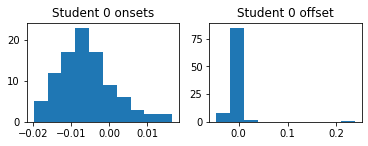

Onset Grade =  100.0 	 Duration Grade =  100.0


Onset ABS  Mean: 0.007854,Onset Mean: -0.005868, Dev. from 0: 0.009316


Offset Mean: -0.003900, Dev. from 0: 0.026518


Articulation Grade =  100.0 Sound Control Grade =  100.0
Final Mark =  100.0
////////////////////////////
0.96
[ 0.00473923  0.0080839   0.00411565 -0.01331066  0.01174603  0.00664399
 -0.01698413  0.00081633 -0.01363946  0.01141723 -0.00529479 -0.00202948]
list0[k]
72.0
Student 1 offset


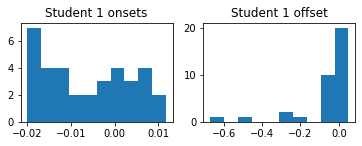

Onset Grade =  72.0 	 Duration Grade =  79.2


Onset ABS  Mean: 0.009811,Onset Mean: -0.005871, Dev. from 0: 0.011569


Offset Mean: -0.062909, Dev. from 0: 0.159243


Articulation Grade =  79.2 Sound Control Grade =  79.2
Final Mark =  79.2
////////////////////////////
0.337
[ 0.00590703 -0.00403628 -0.00026077  0.01156463 -0.0119161   0.00301587
 -0.01358277 -0.01908163 -0.00507937 -0.01261905 -0.00707483 -0.01701814]
list0[k]
79.2
Student 2 offset


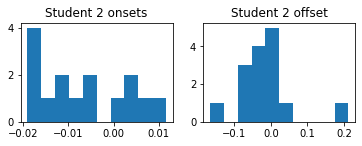

Onset Grade =  79.2 	 Duration Grade =  90.0


Onset ABS  Mean: 0.010175,Onset Mean: -0.006892, Dev. from 0: 0.011899


Offset Mean: -0.014031, Dev. from 0: 0.078121


Articulation Grade =  79.2 Sound Control Grade =  79.2
Final Mark =  79.2
////////////////////////////
0.147
[-0.00909297  0.00096372 -0.0169161   0.00168934 -0.00825397 -0.00996599
  0.00247165 -0.01198413 -0.00418367 -0.01358277 -0.01697279  0.00082766]
list0[k]
79.2
Student 3 offset


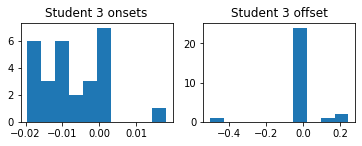

Onset Grade =  79.2 	 Duration Grade =  79.2


Onset ABS  Mean: 0.009338,Onset Mean: -0.007263, Dev. from 0: 0.011423


Offset Mean: -0.012072, Dev. from 0: 0.118731


Articulation Grade =  90.0 Sound Control Grade =  79.2
Final Mark =  79.2
////////////////////////////
0.298
[0.00596372 0.00798186]
list0[k]
56.7
Student 4 offset


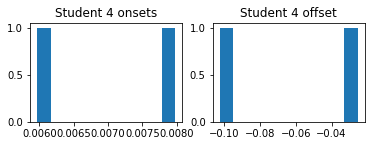

Onset Grade =  56.7 	 Duration Grade =  56.7


Onset ABS  Mean: 0.006973,Onset Mean: 0.006973, Dev. from 0: 0.007045


Offset Mean: -0.063855, Dev. from 0: 0.074612


Articulation Grade =  72.0 Sound Control Grade =  72.0
Final Mark =  72.0
////////////////////////////
0.019
[ 0.01973923 -0.0069161  -0.01588435 -0.01831066  0.01503401 -0.00335601
 -0.00252835  0.01136054  0.01970521  0.00302721  0.00582766  0.00411565]
list0[k]
72.0
Student 5 offset


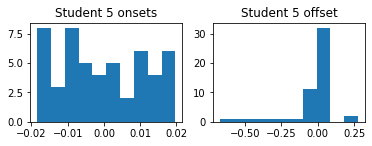

Onset Grade =  72.0 	 Duration Grade =  79.2


Onset ABS  Mean: 0.010198,Onset Mean: -0.000381, Dev. from 0: 0.011702


Offset Mean: -0.034918, Dev. from 0: 0.159365


Articulation Grade =  79.2 Sound Control Grade =  79.2
Final Mark =  79.2
////////////////////////////
0.531
[-0.01843537  0.01482993 -0.00342404]
list0[k]
72.0
Student 6 offset


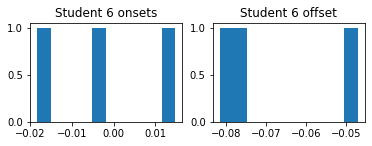

Onset Grade =  72.0 	 Duration Grade =  79.2


Onset ABS  Mean: 0.012230,Onset Mean: -0.002343, Dev. from 0: 0.013802


Offset Mean: -0.068303, Dev. from 0: 0.069989


Articulation Grade =  79.2 Sound Control Grade =  79.2
Final Mark =  79.2
////////////////////////////
0.029
[-0.00903628 -0.00659864 -0.01546485]
list0[k]
79.2
Student 7 offset


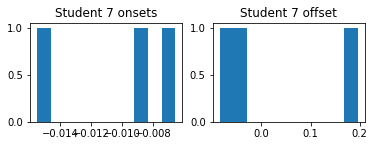

Onset Grade =  79.2 	 Duration Grade =  79.2


Onset ABS  Mean: 0.010367,Onset Mean: -0.010367, Dev. from 0: 0.011021


Offset Mean: 0.022007, Dev. from 0: 0.126530


Articulation Grade =  79.2 Sound Control Grade =  90.0
Final Mark =  79.2
////////////////////////////
0.029


In [96]:
onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std,stats, onset_amean, duration_amean= statisticsGenerator(sonset_deviations,soffset_deviations," onsets", " offset",df_all)

In [97]:
df_all

,Student,precision,recall,f_measure_value,Onset ABS Mean,Onset Mean,Onset Std,Duration ABS Mean,Duration Mean,Duration Std,onsetMark,DurationMark,TF 1 Mark,TF 2 Mark,Sound Quality Mark,finalMark
0,0,0.960,0.950,0.955,0.008,-0.006,0.009,0.008,-0.006,0.009,100.0,100.0,100.0,100.0,100.0,5.00
1,1,0.337,0.347,0.341,0.010,-0.006,0.012,0.072,-0.065,0.162,72.0,79.2,79.2,79.2,79.2,3.15
2,2,0.147,0.149,0.148,0.010,-0.007,0.012,0.052,-0.014,0.078,79.2,90.0,79.2,79.2,79.2,3.60
3,3,0.298,0.277,0.287,0.009,-0.007,0.011,0.056,-0.012,0.119,79.2,79.2,90.0,79.2,79.2,3.60
4,4,0.019,0.020,0.019,0.007,0.007,0.007,0.064,-0.064,0.075,56.7,56.7,72.0,72.0,72.0,2.25
5,5,0.531,0.505,0.518,0.010,-0.000,0.012,0.079,-0.038,0.166,72.0,79.2,79.2,79.2,79.2,3.60
6,6,0.029,0.030,0.029,0.012,-0.002,0.014,0.068,-0.068,0.070,72.0,79.2,79.2,79.2,79.2,3.60
7,7,0.029,0.030,0.030,0.010,-0.010,0.011,0.109,0.022,0.127,79.2,79.2,79.2,90.0,79.2,3.60
8,8,0.269,0.287,0.278,0.010,-0.008,0.012,0.044,-0.037,0.106,90.0,90.0,90.0,90.0,79.2,4.50


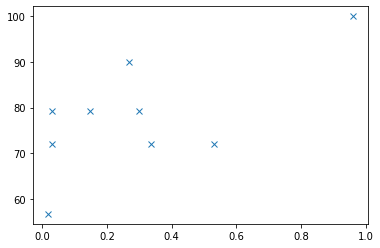

[100.0, 72.0, 79.2, 79.2, 56.7, 72.0, 72.0, 79.2, 90.0]


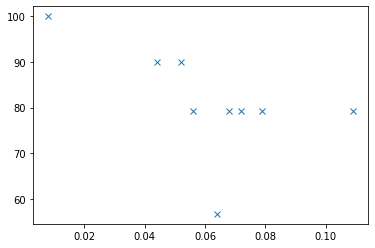

In [98]:
onset_mean_list = df_all["Onset Mean"].tolist()   
onset_amean_list = df_all["Onset ABS Mean"].tolist()   
onset_grade_list = df_all["onsetMark"].tolist()   
onset_precision_list = df_all["precision"].tolist()   

plt.plot(onset_precision_list,onset_grade_list, 'x')
plt.show()

Duration_mean_list = df_all["Duration Mean"].tolist()   
Duration_amean_list = df_all["Duration ABS Mean"].tolist()   
Duration_amean_list = df_all["Duration ABS Mean"].tolist()
Duration_grade_list = df_all[" DurationMark"].tolist()   
print(onset_grade_list)

plt.plot(Duration_amean_list,Duration_grade_list, 'x')
plt.show()

# I should try to plot Precision against  ONSET_GRADE(Y) vs PRECISION (X)
# I should try to plot Precision against  ONSET_GRADE(Y) vs ABSOLUTE MEAN (X)
# TRY TO EXPLAIN
#onset_X, onset_mean, onset_std, duration_X, duration_mean, duration_std,stats, onset_amean, duration_amean= 
#statisticsGenerator(sonset_deviations,soffset_deviations," onsets", " offset",df_all)

In [99]:
import pandas as pd
#sonset_deviations,soffset_deviations

In [100]:
data_timing_onset0= { 'onsets0' :sonset_deviations[0]}
df = pd.DataFrame(data_timing_onset0,columns=['onsets0'])
fig = px.histogram(df, x="onsets0")
fig.show()

In [101]:

data_timing_duration0= { 'durations0' :soffset_deviations[0]}
df = pd.DataFrame(data_timing_duration0,columns=['durations0'])
fig = px.histogram(df, x="durations0")
fig.show()

In [102]:
dataset = pd.read_csv('drive/MyDrive/Bass/data/road/StudentStatistics_road.csv') 
#dataset = pd.read_csv('drive/MyDrive/Bass/data/StudentStatisticsBillie.csv')
header = ["Student", "precision", "recall", "f_measure_value", "Onset ABS Mean", "Onset Mean", "Onset Std",
             "Duration ABS Mean", "Duration Mean", "Duration Std", "onsetMark", " DurationMark", " TF 1 Mark ",
             " TF 2 Mark ", "Sound Quality Mark", " finalMark"]

In [103]:
dataset

,Student,precision,recall,f_measure_value,Onset ABS Mean,Onset Mean,Onset Std,Duration ABS Mean,Duration Mean,Duration Std,onsetMark,DurationMark,TF 1 Mark,TF 2 Mark,Sound Quality Mark,finalMark
0,0,0.960,0.950,0.955,0.008,-0.006,0.009,0.008,-0.006,0.009,100.0,100.0,100.0,100.0,100.0,5.00
1,1,0.337,0.347,0.341,0.010,-0.006,0.012,0.072,-0.065,0.162,72.0,79.2,79.2,79.2,79.2,3.15
2,2,0.147,0.149,0.148,0.010,-0.007,0.012,0.052,-0.014,0.078,79.2,90.0,79.2,79.2,79.2,3.60
3,3,0.298,0.277,0.287,0.009,-0.007,0.011,0.056,-0.012,0.119,79.2,79.2,90.0,79.2,79.2,3.60
4,4,0.019,0.020,0.019,0.007,0.007,0.007,0.064,-0.064,0.075,56.7,56.7,72.0,72.0,72.0,2.25
5,5,0.531,0.505,0.518,0.010,-0.000,0.012,0.079,-0.038,0.166,72.0,79.2,79.2,79.2,79.2,3.60
6,6,0.029,0.030,0.029,0.012,-0.002,0.014,0.068,-0.068,0.070,72.0,79.2,79.2,79.2,79.2,3.60
7,7,0.029,0.030,0.030,0.010,-0.010,0.011,0.109,0.022,0.127,79.2,79.2,79.2,90.0,79.2,3.60
8,8,0.269,0.287,0.278,0.010,-0.008,0.012,0.044,-0.037,0.106,90.0,90.0,90.0,90.0,79.2,4.50


In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
#X = dataset[['P', 'R', 'F',  ' ABS Mean Onset','Mean  Onset','Std Onset',' ABS Mean Duration','Mean Duration','Std Duration']]
#X = dataset[['precision', 'recall', 'f_measure_value',  'Onset ABS Mean','Onset Mean','Onset Std']]
#X = dataset[['precision','recall','f_measure_value']]#,'Onset Mean','Onset Std']]
X = dataset[['precision','recall','f_measure_value','Onset Mean']]#,]]
y=array(dataset['onsetMark'])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# IEC PRF Mean Absolute Error: 12.079847760757067
# IEC PRF Root Mean Squared Error: 12.521853181718802

      Actual  Predicted
0  79.199997  76.868451
1  79.199997  79.539835
2  72.000000  92.954490
Mean Absolute Error: 7.87529110177933
Root Mean Squared Error: 12.174320445316223


In [105]:
dataset

,Student,precision,recall,f_measure_value,Onset ABS Mean,Onset Mean,Onset Std,Duration ABS Mean,Duration Mean,Duration Std,onsetMark,DurationMark,TF 1 Mark,TF 2 Mark,Sound Quality Mark,finalMark
0,0,0.960,0.950,0.955,0.008,-0.006,0.009,0.008,-0.006,0.009,100.0,100.0,100.0,100.0,100.0,5.00
1,1,0.337,0.347,0.341,0.010,-0.006,0.012,0.072,-0.065,0.162,72.0,79.2,79.2,79.2,79.2,3.15
2,2,0.147,0.149,0.148,0.010,-0.007,0.012,0.052,-0.014,0.078,79.2,90.0,79.2,79.2,79.2,3.60
3,3,0.298,0.277,0.287,0.009,-0.007,0.011,0.056,-0.012,0.119,79.2,79.2,90.0,79.2,79.2,3.60
4,4,0.019,0.020,0.019,0.007,0.007,0.007,0.064,-0.064,0.075,56.7,56.7,72.0,72.0,72.0,2.25
5,5,0.531,0.505,0.518,0.010,-0.000,0.012,0.079,-0.038,0.166,72.0,79.2,79.2,79.2,79.2,3.60
6,6,0.029,0.030,0.029,0.012,-0.002,0.014,0.068,-0.068,0.070,72.0,79.2,79.2,79.2,79.2,3.60
7,7,0.029,0.030,0.030,0.010,-0.010,0.011,0.109,0.022,0.127,79.2,79.2,79.2,90.0,79.2,3.60
8,8,0.269,0.287,0.278,0.010,-0.008,0.012,0.044,-0.037,0.106,90.0,90.0,90.0,90.0,79.2,4.50


In [106]:
X = dataset[['precision','recall','f_measure_value']]
#X = dataset[['precision','recall','f_measure_value']]
y=array(dataset[' DurationMark'])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)# of you ommit it will be random
# related to the seed in random function
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

X = dataset[['precision','recall','f_measure_value','Duration Mean']]
y=array(dataset[' DurationMark'])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)# of you ommit it will be random
# related to the seed in random function
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))





      Actual  Predicted
0  79.199997  72.998947
1  90.000000  76.615766
2  79.199997  84.218698
Mean Absolute Error: 8.20132852897864
Root Mean Squared Error: 8.995889963027182
      Actual  Predicted
0  79.199997  94.506747
1  90.000000  86.044304
2  79.199997  74.614595
Mean Absolute Error: 7.949282514488232
Root Mean Squared Error: 9.503859418501108


In [107]:
dataset

,Student,precision,recall,f_measure_value,Onset ABS Mean,Onset Mean,Onset Std,Duration ABS Mean,Duration Mean,Duration Std,onsetMark,DurationMark,TF 1 Mark,TF 2 Mark,Sound Quality Mark,finalMark
0,0,0.960,0.950,0.955,0.008,-0.006,0.009,0.008,-0.006,0.009,100.0,100.0,100.0,100.0,100.0,5.00
1,1,0.337,0.347,0.341,0.010,-0.006,0.012,0.072,-0.065,0.162,72.0,79.2,79.2,79.2,79.2,3.15
2,2,0.147,0.149,0.148,0.010,-0.007,0.012,0.052,-0.014,0.078,79.2,90.0,79.2,79.2,79.2,3.60
3,3,0.298,0.277,0.287,0.009,-0.007,0.011,0.056,-0.012,0.119,79.2,79.2,90.0,79.2,79.2,3.60
4,4,0.019,0.020,0.019,0.007,0.007,0.007,0.064,-0.064,0.075,56.7,56.7,72.0,72.0,72.0,2.25
5,5,0.531,0.505,0.518,0.010,-0.000,0.012,0.079,-0.038,0.166,72.0,79.2,79.2,79.2,79.2,3.60
6,6,0.029,0.030,0.029,0.012,-0.002,0.014,0.068,-0.068,0.070,72.0,79.2,79.2,79.2,79.2,3.60
7,7,0.029,0.030,0.030,0.010,-0.010,0.011,0.109,0.022,0.127,79.2,79.2,79.2,90.0,79.2,3.60
8,8,0.269,0.287,0.278,0.010,-0.008,0.012,0.044,-0.037,0.106,90.0,90.0,90.0,90.0,79.2,4.50


In [108]:
X = dataset[['precision','recall','f_measure_value','Onset ABS Mean','Duration ABS Mean']]
y=array(dataset[' finalMark'])


#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

   Actual  Predicted
0    3.60   4.084500
1    3.60   5.483432
2    3.15  -1.320617
Mean Absolute Error: 2.2795165506465547
Root Mean Squared Error: 2.814751489671162
